In [1]:
!pip install textblob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

In [3]:
df = pd.read_csv('chatgpt_reviews.csv')
df.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df['review'] = df['review'].fillna('')
df['rating'] = pd.to_numeric(df['review'], errors='coerce')

In [6]:
def get_sentiment(text):
    blob = TextBlob(text)
    return pd.Series([blob.sentiment.polarity, blob.sentiment.subjectivity])

df[['polarity', 'subjectivity']] = df['review'].apply(get_sentiment)

In [7]:
def sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(sentiment_label)

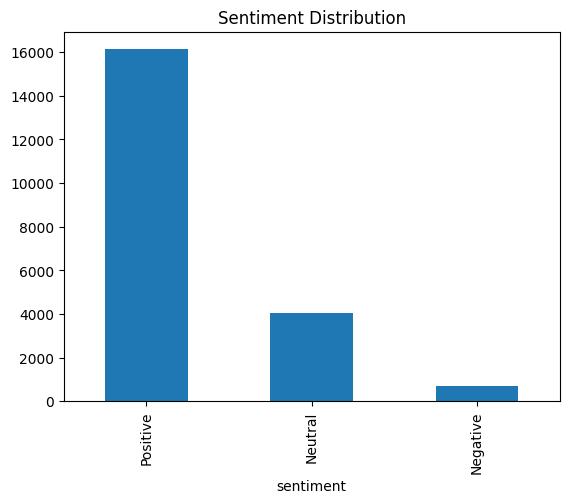

In [8]:
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.show()

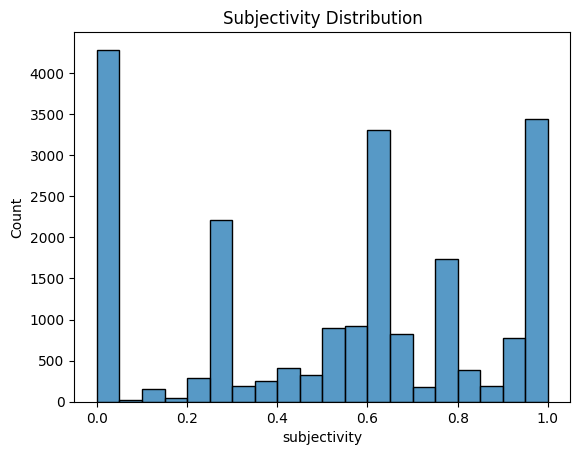

In [9]:
sns.histplot(df['subjectivity'], bins=20)
plt.title('Subjectivity Distribution')
plt.show()